In [19]:
import numpy as np
import pandas as pd
from scipy.stats import randint
import matplotlib.pyplot as plt
% matplotlib inline

x=pd.read_csv('processed_scaled.csv',index_col=0)
x.drop('Graduation_Rate_School', axis=1,inplace=True)
y=pd.read_csv('grad_rate.csv', header=None)[1].values

In [20]:
x.shape

(121, 192)

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(criterion='mse', n_jobs=-1, random_state=5)

rf_params = {'n_estimators': randint(5,100), 
             'max_features':randint(10, 50),
             'max_depth': randint(5, 10), 
             'min_samples_split': randint(5, 20)}

rand_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, cv=5, n_jobs=-1, n_iter=50)
rand_search.fit(x, y)
print rand_search.best_score_
print rand_search.best_params_

0.7045546207417784
{'max_features': 36, 'min_samples_split': 8, 'n_estimators': 66, 'max_depth': 9}


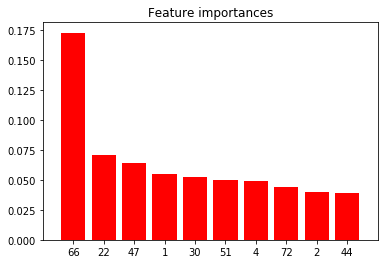

In [24]:
# building model with best params
rf = RandomForestRegressor(n_estimators=66, max_features=36, min_samples_split=8, max_depth=9, n_jobs=-1, random_state=5)
rf.fit(x,y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_ten = indices[:10]

plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[top_ten],
       color="r", align="center")
plt.xticks(range(10), top_ten)
plt.xlim([-1, 10])
plt.show()

In [25]:
# get names of important features
for i in top_ten:
    print x.columns[i]

Student_Growth_Rating_NO DATA AVAILABLE
Student_Special_Ed_Pct
Refugee_Services_U
Average_ACT_School
School_Type_Citywide-Option
Overall_Rating_Inability to Rate
Attainment_ACT_Grade_11_Pct
Student_Attainment_Rating_NO DATA AVAILABLE
College_Enrollment_Rate_School
Bilingual_Services_U
